# Anchor video analysis

This notebook analyze the anchor videos which records the activity of bacteria before experiments.

I will start by analyzing the particle detecting results from ImageJ. Later, the detecting routine will be implemented in Python.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import trackpy as tp
from scipy.optimize import curve_fit
from activity_utils import *

In [42]:
# load xy results
folder = '/media/zhengyang/NothingToSay/DE/11032021/Analysis/12'
xy = pd.read_csv(os.path.join(folder, 'detection.csv'))
print("{0:d} particles are detected in {1:d} images".format(len(xy), len(xy.frame.unique())))

218111 particles are detected in 500 images


In [43]:
t = tp.link(xy, 10, memory=30)
t1 = tp.filter_stubs(t, 50)
print("{0:d} particles survived".format(len(t1)))

Frame 500: 423 trajectories present.
29403 particles survived


Text(0, 0.5, 'MSD')

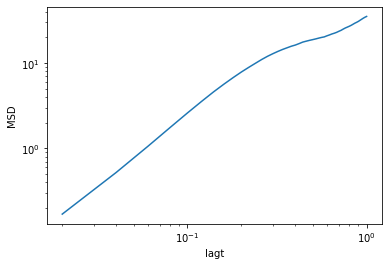

In [44]:
# compute msd
msd = tp.emsd(t1, mpp=0.11, fps=50, max_lagtime=50)
msd.plot()
plt.loglog()
plt.ylabel('MSD')

v = 18.0 um/s
if fitting is not good, tinker the fitting range in the msd_to_velocity function


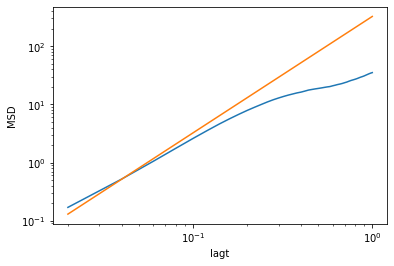

In [45]:
# fit msd for velocity and examine the fitting quality
# plot the msd and fitting, if fitting is not good, tinker the fitting range in the msd_to_velocity function 
v = msd_to_velocity(msd[:0.1])
msd.plot()
plt.plot(msd.index, (v*msd.index)**2)
plt.loglog()
plt.ylabel('MSD')
print('v = {:.1f} um/s\nif fitting is not good, tinker the fitting range in the msd_to_velocity function'.format(v))

In [46]:
# Save results? (MSD, velocity, MSD-velocity plot)
msd.to_csv(os.path.join(folder, 'MSD.csv'))
with open(os.path.join(folder, 'velocity.txt'), 'w') as f:
    f.write("velocity = {:.1f} um/s".format(v))
msd.plot()
plt.plot(msd.index, (v*msd.index)**2)
plt.loglog()
plt.ylabel('MSD')
plt.savefig(os.path.join(folder, 'MSD-velocity.jpg'))
plt.close()
print("Save successful!")

Save successful!


In [10]:
# load video fast?
from corrLib import readdata
from skimage import io
from myImageLib import bpass
test_folder = '/home/zhengyang/data/DE/10262021/00'
l = readdata(test_folder, 'tif')

In [16]:
l.Dir

0      /home/zhengyang/data/DE/10262021/00/00000.tif
1      /home/zhengyang/data/DE/10262021/00/00001.tif
2      /home/zhengyang/data/DE/10262021/00/00002.tif
3      /home/zhengyang/data/DE/10262021/00/00003.tif
4      /home/zhengyang/data/DE/10262021/00/00004.tif
                           ...                      
495    /home/zhengyang/data/DE/10262021/00/00495.tif
496    /home/zhengyang/data/DE/10262021/00/00496.tif
497    /home/zhengyang/data/DE/10262021/00/00497.tif
498    /home/zhengyang/data/DE/10262021/00/00498.tif
499    /home/zhengyang/data/DE/10262021/00/00499.tif
Name: Dir, Length: 500, dtype: object

In [2]:
%%time
im_list = []
for num, i in l[:100].iterrows():
    img = io.imread(i.Dir)
    im_list.append(img)

CPU times: user 481 ms, sys: 417 ms, total: 898 ms
Wall time: 897 ms


In [17]:
%%time
imseq = map(io.imread, l[:100].Dir)
# li = list(imseq)

CPU times: user 83 µs, sys: 53 µs, total: 136 µs
Wall time: 146 µs


In [33]:
imseq = map(io.imread, l[:100].Dir)
bpseq = map(bpass, map(io.imread, l.Dir), np.ones(len(l))*3, np.ones(len(l))*100)

In [35]:
import time
t1 = time.monotonic()
imseq = map(io.imread, l[:100].Dir)
bpseq = map(bpass, map(io.imread, l.Dir), np.ones(len(l))*3, np.ones(len(l))*100)
list(bpseq)
t2 = time.monotonic()
imseq = map(io.imread, l[:100].Dir)
bpseq = map(bpass, map(io.imread, l.Dir), np.ones(len(l))*3, np.ones(len(l))*100)
[*bpseq]
t3 = time.monotonic()
print("list method takes {0:.1f} s\n* method takes {1:.1f} s".format(t2-t1, t3-t2))

list method takes 176.8 s
* method takes 176.7 s
